# TAREA 2 - REGRESIÓN LINEAL MULTIVARIADA

## PREVIO: Importar librerías y cargar datos

In [397]:
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500

pio.renderers.default = "colab"

In [398]:
#cargar dataset
path = './employee_attrition.csv'

df = pd.read_csv(path)


# PARTE 1: Exploración de Datos y Variables

## P1. Investigue acerca de cuáles variables influyen en explicar el salario de una persona

Las variables que influyen en el salario **(de forma independiente)** serán rankeadas según su correlación con dicha variable, y se descartarán aquellas que tienen relación directa, como por ejemplo MonthlyRate. Esto con el objetivo de tener una idea intuitiva de cómo es la entropía de estos datos. De igual forma, se realizará una mini investigación sobre cuales son las variables que podrían tener influencia directa en el sueldo.

In [399]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0


In [400]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

Las variables nominales serán pasadas a dummy para obtener una comparación numérica. 

In [402]:
df_with_dummies = pd.get_dummies(df)

In [403]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [404]:
df_with_dummies.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.838776,0.161224,0.102041,0.188435,0.709524,0.042857,0.653741,0.303401,0.018367,0.412245,0.108163,0.315646,0.055782,0.089796,0.400000,0.600000,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,1.0,0.717007,0.282993
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863,0.367863,0.302805,0.391193,0.454137,0.202604,0.475939,0.459884,0.134321,0.492406,0.310692,0.464931,0.229579,0.285986,0.490065,0.490065,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.0,0.450606,0.450606
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,

In [405]:
x = 'MonthlyIncome'

In [406]:
#Correlaciones

corrM = df_with_dummies.corr(method='spearman')

corr_MonthlyIncome = corrM[x]

In [407]:
corr_MonthlyIncome

Age                                  0.471902
DailyRate                            0.016260
DistanceFromHome                     0.002512
Education                            0.120028
EmployeeNumber                       0.001797
EnvironmentSatisfaction             -0.015163
HourlyRate                          -0.019762
JobInvolvement                      -0.024552
JobLevel                             0.920429
JobSatisfaction                      0.004881
MonthlyIncome                        1.000000
MonthlyRate                          0.054277
NumCompaniesWorked                   0.190307
PercentSalaryHike                   -0.033767
PerformanceRating                   -0.026999
RelationshipSatisfaction             0.003885
StockOptionLevel                     0.045852
TotalWorkingYears                    0.710024
TrainingTimesLastYear               -0.034847
WorkLifeBalance                      0.030759
YearsAtCompany                       0.464315
YearsInCurrentRole                

Correlaciones negativas solo indican proporcionalidad inversa, por lo que se tomará el valor absoluto para visualizar mejor las variables que más correlación tienen con MontlyIncome.

In [408]:
abs(corr_MonthlyIncome).sort_values()

EmployeeNumber                       0.001797
DistanceFromHome                     0.002512
RelationshipSatisfaction             0.003885
JobSatisfaction                      0.004881
OverTime_Yes                         0.008910
OverTime_No                          0.008910
EducationField_Life Sciences         0.009182
BusinessTravel_Non-Travel            0.011643
EducationField_Human Resources       0.012124
EnvironmentSatisfaction              0.015163
DailyRate                            0.016260
EducationField_Other                 0.018608
HourlyRate                           0.019762
JobInvolvement                       0.024552
BusinessTravel_Travel_Frequently     0.024672
EducationField_Medical               0.025829
PerformanceRating                    0.026999
BusinessTravel_Travel_Rarely         0.029016
WorkLifeBalance                      0.030759
MaritalStatus_Divorced               0.031773
Department_Human Resources           0.032108
PercentSalaryHike                 

Se tienen entonces las correlaciones para este dataset con respecto a la variable objetivo. Notar que esta metodología puede caer fuertemente en sesgos si no se hace además un análisis cualitativo de las variables. Lo anterior debido a que la muestra presentada no necesariamente es representativa y sólo aplicarían para la empresa en particular de la cual se recolectaron los datos si ese fue el caso. De igual forma, correlaciones no lineales entre el sueldo y otras variables afectarían negativamente en la posición de dicha variable versus otras con correlaciones lineales.

Dicho lo anterior, se pueden ver resultados coincidentes con lo intuitivo. El nivel de trabajo es la variable que más correlación tiene con el sueldo, mientras que las siguientes variables tienen que ver bastante entre sí, ya que corresponden a medidas de tiempo, específicamente el número de años que lleva la persona en ciertas actividades (salvo por la edad); debido a esto, se deben además visualizar las correlaciones entre las otras variables, y de esta forma **evitar la multicolinealidad exacta** (variables con alta correlacion entre sí no son buenas para un modelo multivariable). Seguido de estas variables de tiempo, la correlación disminuye su valor ante variables como numCompaniesWorked y Education.

Por otro lado, con respecto a una pequeña revisión al respecto de las variables que afectan el sueldo, se pudo hallar información de distintas fuentes que afirman que el factor protagónico en el sueldo tiene que ver con el nivel de responsabilidad que requiere un puesto de trabajo, lo cual tiene que ver en este dataset con la variable 'JobLevel'. De la mano con lo anterior, las fuentes investigadas aseguran también que la edad tendría una relación con el sueldo de forma indirecta, ya que empleados con mayor experiencia son usualmente empleados con una edad más avanzada que quienes tienen poca experiencia [1][2]. Se afirma también que variables como el nivel educacional, el sexo y el estado civil afectan significativamente en el ingreso mensual[3]*. Finalmente, también se menciona que el nivel de demanda y competitividad existente para la ocupación del empleado afecta en el sueldo que este recibe (e.g. carreras de alta demanda tendrían un mayor sueldo que carreras menos demandadas en la industria) [2].


*El articulo de la cita [3] corresponde a un estudio hecho en china con el objetivo de buscar injusticias y discriminación en el sueldo según variables que debiesen estar uniformemente distribuídas, por lo que las conclusiones de este estuido no necesariamente sean ciertas para estos datos, pero sin embargo es necesario revisar dichas variables para detectar alguna injusticia en las distribuciones de sueldo.


[1] [*Public and private sector earnings in the UK: 2017. - Factors affecting earnings – descriptive analysis*](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/articles/analysisoffactorsaffectingearningsusingannualsurveyofhoursandearnings/2017#factors-affecting-earnings-descriptive-analysis)

[2] [*What Factors Affect Your Income?*](https://financeintheclassroom.org/downloads/FactorsAffectIncome.pdf)

[3] [*Examining the Factors Affecting Personal 
Income: An Empirical Study Based on Survey 
Data in Chinese Cities*](https://journal.hep.com.cn/fec/EN/10.3868/s060-006-017-0022-0#:~:text=We%20find%20a%20number%20of,different%20occupations%20are%20also%20investigated)


------------------------------------------------------------------------------

A continuación se muestra la matriz de correlación entre variables. En ella se puede ver la alta correlación que tiene la variable JobLevel con Monthly Income; también se puede ver que las variables YearsAtCompany, YearsWithCurrManager, YearsSinceLastPromotion, YearsInCurrentRole y TotalWorkingYears tienen una alta correlación entre sí, por lo que para un modelo multivariable solo habría que usar una de estas variables. De igual forma, es necesario señalar que las variables descriptivas (las que se pasaron a dummy) no tienen una alta representatividad en la matriz de correlación debido a su carácter discreto (y específicamente binario o de pocas instancias).




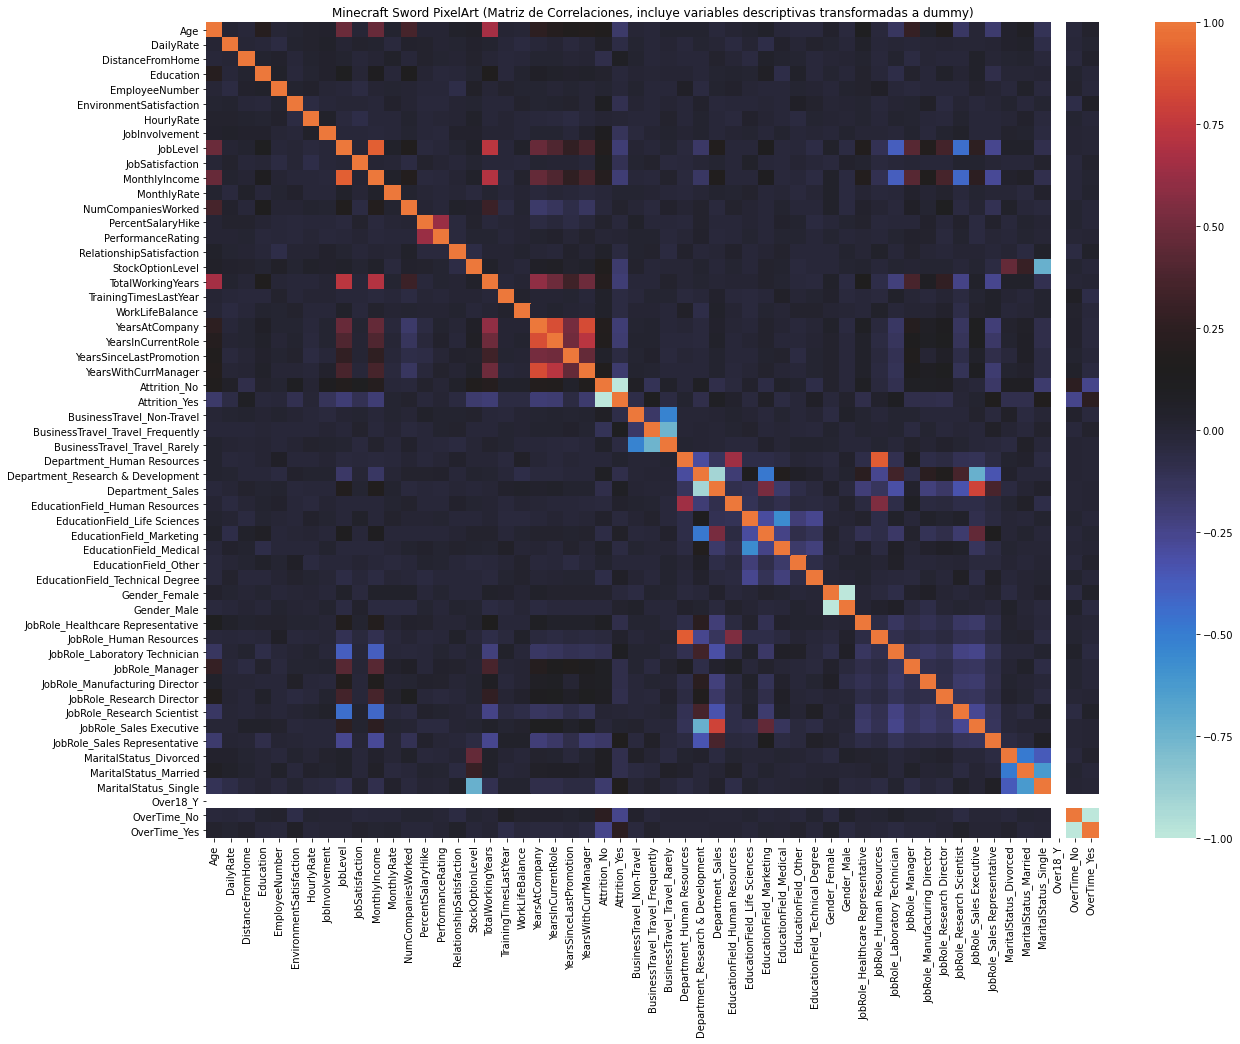

In [409]:
## Revisión del mapa de correlaciones..
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(corrM, ax = ax,
        xticklabels=corrM.columns,
        yticklabels=corrM.columns,center=0.15);

ax.set_title('Minecraft Sword PixelArt (Matriz de Correlaciones, incluye variables descriptivas transformadas a dummy)');

Dado lo anterior entonces, se eligen las siguientes variables como prioridad a analizar: 

* JobLevel
* TotalWorkingYears
* Age
* Education
* Gender
* JobRole

## P2 Analice las variables con las que cuenta según lo investigado en la parte anterior.

Evalúe la necesidad de normalizar/estandarizar los datos o transformar las variables (por ejemplo a dummy o aplicar logaritmo).

En la parte anterior, se pasaron a dummy todas las variables descriptivas con el objetivo de poder trabajarlas numéricamente (debido a su propia naturaleza, no se podían tratar numéricamente sin este ajsute) . A continuación se harán distintas visualizaciones que permitirán decidir qué hacer con las variables seleccionadas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



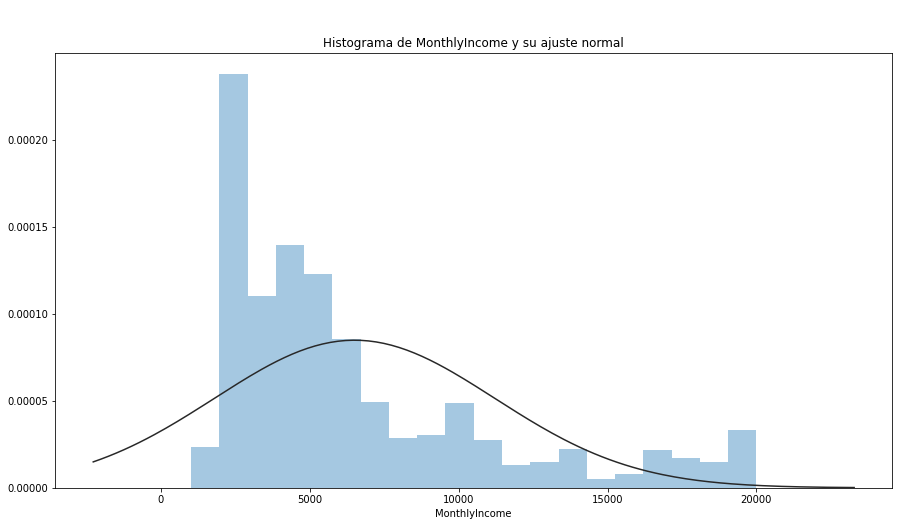

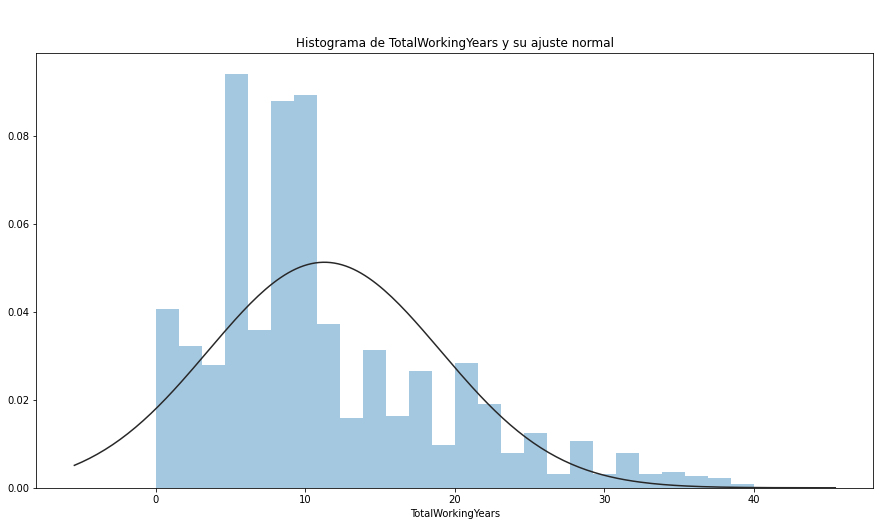

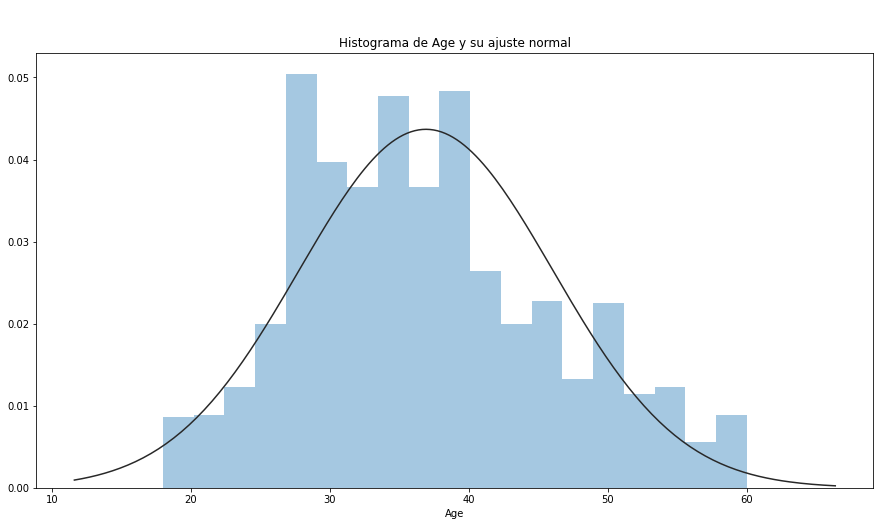

In [410]:
variables_de_interes_continuas = ['MonthlyIncome', 'TotalWorkingYears', 'Age']
variables_de_interes_descriptivas = ['JobLevel', 'Education', 'Gender', 'JobRole']



for variable in variables_de_interes_continuas:

  fig, ax = plt.subplots(figsize=(15,8))
  
  sns.distplot(df[variable], kde = False ,fit=stats.norm)

  ax.set_title(f'\n\nHistograma de {variable} y su ajuste normal')


De las variables numéricas graficadas aquí, es necesario sacar logaritmo de TotalWorkingYears y de MonthlyIncome, debido a su caracteristica distribución inclinada a la izquierda. De igual forma se hará con la variable Age, pues su ajuste normal también podría mejorar con logaritmo.

In [411]:
df_ajustado = pd.DataFrame()
df_ajustado['MonthlyIncome'] = df['MonthlyIncome']
df_ajustado['TotalWorkingYears'] = df['TotalWorkingYears']
df_ajustado['Age'] = df['Age']

df_ajustado['LogMonthlyIncome'] = np.log(df['MonthlyIncome']+1)
df_ajustado['LogTotalWorkingYears'] = np.log(df['TotalWorkingYears']+1)
df_ajustado['LogAge'] = np.log(df['Age']+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



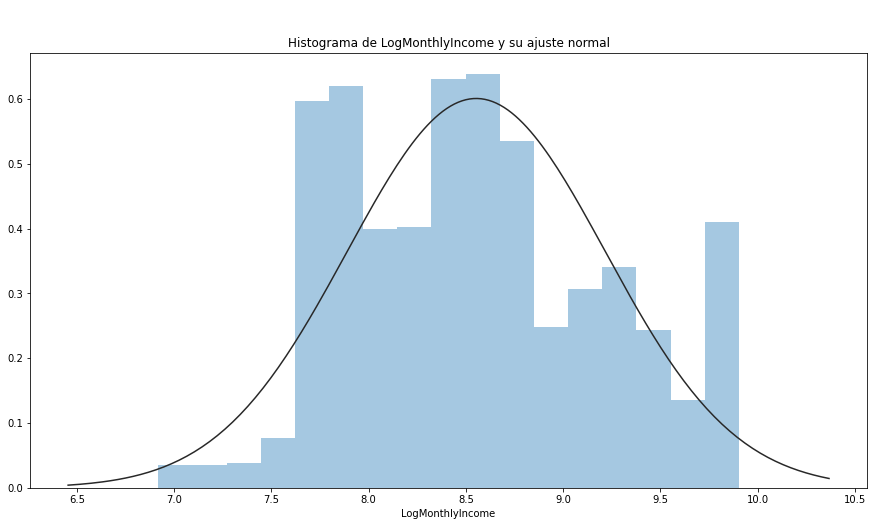

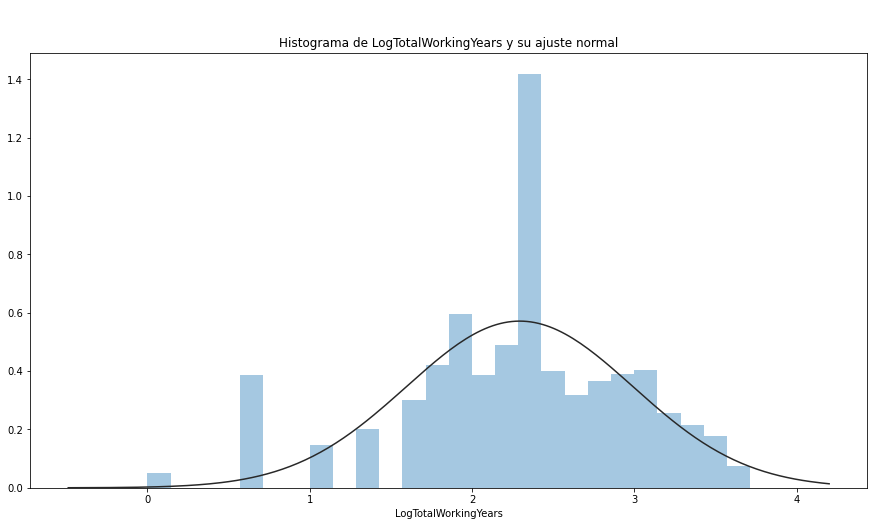

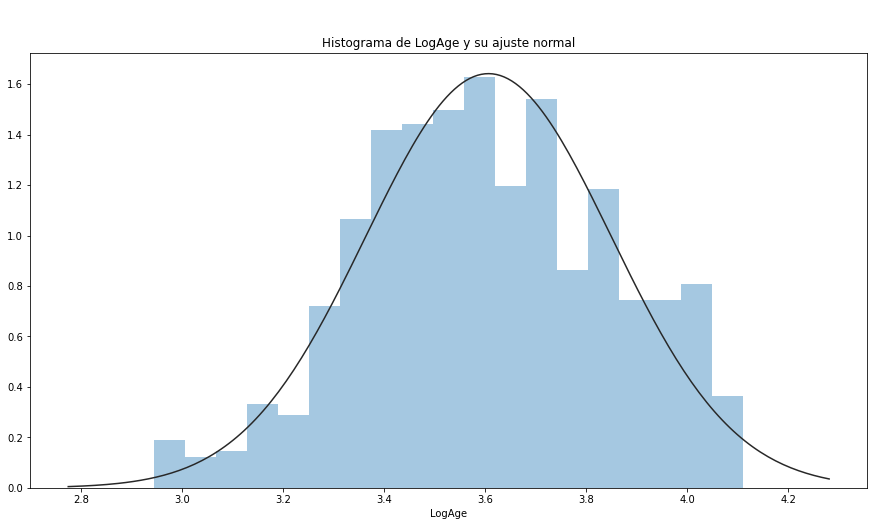

In [412]:
variables_df_ajustado = ['LogMonthlyIncome', 'LogTotalWorkingYears', 'LogAge']


for variable in variables_df_ajustado:

  fig, ax = plt.subplots(figsize=(15,8))
  
  sns.distplot(df_ajustado[variable], kde = False ,fit=stats.norm)

  ax.set_title(f'\n\nHistograma de {variable} y su ajuste normal')

La transformación logarítmica de los datos permite un mejor ajuste normal. Lo cual es conveniente para la regresión lineal pues disminuye el efecto de los sesgos [[4]](https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c).

## P3 Realice un gráfico de dispersión para algunas variables que considere relevantes en este problema.

Realice graficos para ver la relacion entre las variables independientes con la
dependiente.

NOTA: Se trabajará con los datos originales para de esta forma apoyar o poner en duda el uso de las estrategias anteriormente propuestas.

A continuación se harán scatter plots coloreados según alguna variable descriptiva.

Como puede verse, JobLevel divide de forma casi perfecta a ciertos grupos en las variables de tiempo y de ingreso mensual. JobRole también genera algunos 'clusters' de mayores ingresos y edad (Director y Manager por ejemplo). Gender a simple vista no genera división en sueldo y edad, salvo algunos valores outliers que favorecen a los hombres en cierta medida. De igual forma, se puede ver una tendencia con clara intención de proporcionalidad directa, pero muy dispersa en cuanto a la variable age y totalWorkingYears con respecto a MonthlyIncome, lo anterior debido a que no se ve un limite de edad para sueldos bajos, pero sí se ve una limitación en los sueldos altos y la edad, es decir,  muy poca gente joven tiene sueldos altos, pero la gente mayor o con más experiencia tiene una amplia distribución de sueldo (en promedio mayor, pero con alta desviación).

In [413]:
variables_de_interes = ['MonthlyIncome', 'TotalWorkingYears', 'Age', 'JobLevel', 'Education', 'Gender', 'JobRole']

df_2 =df.replace({'Education':{1: 'Below College', 2: 'College',  3: 'Bachelor', 4: 'Master', 5: 'Doctor'}})

df_2 =df_2.replace({'JobLevel':{1: 'Muy Bajo', 2: 'Bajo',  3: 'Medio', 4: 'Alto', 5: 'Muy Alto'}})

for nominal in variables_de_interes_descriptivas:
  fig = px.scatter_matrix(df_2[variables_de_interes], dimensions=variables_de_interes[:3] ,color = nominal)

  fig.update_layout(
    title=f'Scatter Plots para las variables ordinales y continuas, separado según {str(nominal)} ',
    dragmode='select',
    width=800,
    height=800,
    hovermode='closest',
  )

  fig.show()

A continuación se realizan boxplots que analizan diversas combinaciones de las variables descriptivas con la variable objetivo (MonthlyIncome). Estos aumentan la intuición de que no hay sesgo de género. Aquí puede verse con mayor claridad el cómo JobLevel y JobRole generan grupos de gente con sueldos absolutamente diferentes. Se puede ver además que la educación no está tan relacionada con el sueldo como se podría creer popularmente.


In [414]:

fig = px.box(df_2, 'Gender',  'MonthlyIncome', color = 'Education', title='Caracterización de los Trabajadores según Edad, Género y Nivel Educacional.', points='all')

fig.update_layout(
    title='BoxPlots para variables descriptivas vs continuas: Education ',
    dragmode='select',
    width=1300,
    height=500,
    hovermode='closest',
)

fig.show()


fig = px.box(df_2, 'Gender',  'MonthlyIncome', color = 'JobRole', title='Caracterización de los Trabajadores según Edad, Género y Nivel Educacional.', points='all')

fig.update_layout(
    title='BoxPlots para variables descriptivas vs continuas: JobRole ',
    dragmode='select',
    width=1300,
    height=500,
    hovermode='closest',
)

fig.show()



fig = px.box(df_2, 'Gender',  'MonthlyIncome', color = 'JobLevel', title='Caracterización de los Trabajadores según Edad, Género y Nivel Educacional.', points='all')

fig.update_layout(
    title='BoxPlots para variables descriptivas vs continuas: JobLevel',
    dragmode='select',
    width=1300,
    height=500,
    hovermode='closest',
)

fig.show()



## P4.  Analice la relevancia que tiene cada variable con la variable dependiente y entre ellas.


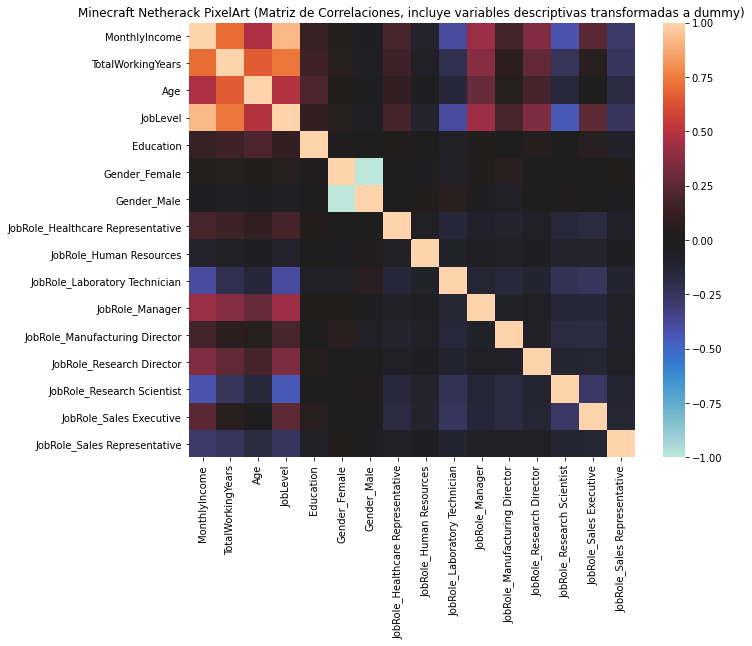

In [415]:
variables_de_interes = ['MonthlyIncome', 'TotalWorkingYears', 'Age', 'JobLevel', 'Education', 'Gender', 'JobRole']

df_var = pd.get_dummies(df[variables_de_interes])

corrM = df_var.corr(method = 'spearman')


fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corrM, ax = ax,
        xticklabels=corrM.columns,
        yticklabels=corrM.columns,center=0.0);

ax.set_title('Minecraft Netherack PixelArt (Matriz de Correlaciones, incluye variables descriptivas transformadas a dummy)');

Finalmente, con base a todo lo de las preguntas anteriores, se llega a la conclusión que, de las variables seleccionadas, las que tienen mayor valor al momento de explicar el sueldo son (ordenadas de mayor a menor):

* JobLevel
* TotalWorkingYears
* JobRole

Mientras que las variables Age, Gender y Education tienen menor influencia en la variable objetivo, contrario a lo que anteriormente se propuso. Específicamente, Age tiene una alta correlación con TotalWorkingYears, por lo que un modelo con estas dos variables no sería óptimo.

De igual forma, JobLevel y TotalWorkingYears tienen una alta correlación entre sí, por lo que solo quedarían las variables de **JobLevel** y **JobRole** como candidatos ideales para explicar el sueldo. Lamentablemente, dado que se trata de variables discretas y de pocas instancias, estas dos variables por sí solas generarán predicciones discretas, por lo que es fundamental tener cuidado al trabajar con ellas. Igualmente, entre ciertos roles de trabajo existen correlaciones relativamente altas con JobLevel, por lo que tampoco sería ideal usar estas variables en conjunto. La correlación de TotalWorkingYears con JobLevel se puede solucionar utilizando la variable Age con JobLevel, la cual tiene una correlación más baja con esta variable y suficientemente alta con MonthlyIncome como para ser considerada.

Con respecto a las variables dummy de JobRole; las variables human resources, manager, laboratory tecnician y research scientist son las que más correlación tienen con la variable objetivo. Estas variables tienen una baja correlación entre sí, lo que no es malo para el modelo si es que se llegan a usar juntas como es de esperarse.

# P2

### Modelo 1: Datos semi-crudos

Se experimentará inicialmente con todas las variables planteadas, y sin preprocesar (sin aplicar logaritmo). El modelo resultante debiese funcionar, aunque no de forma óptima.

In [416]:
variables_de_interes = ['MonthlyIncome', 'JobLevel',  'Age','Education' ,'JobRole', 'Gender']

variables_continua = variables_de_interes[:3]

variables_a_dummy = variables_de_interes[3:]

df_m1 = pd.DataFrame()

for continua in variables_continua:
  df_m1[continua] = df[continua]


for variable in variables_a_dummy:
  for dummy in df_with_dummies.columns:
    if variable in dummy and 'EducationF' not in dummy:

      df_m1[dummy] = df_with_dummies[dummy]
 

In [417]:
df_m1.describe()

,MonthlyIncome,JobLevel,Age,Education,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6502.931293,2.063946,36.923810,2.912925,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.400000,0.600000
std,4707.956783,1.106940,9.135373,1.024165,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.490065,0.490065
min,1009.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2911.000000,1.000000,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4919.000000,2.000000,36.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8379.000000,3.000000,43.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,19999.000000,5.000000,60.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [418]:
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   MonthlyIncome                      1470 non-null   int64
 1   JobLevel                           1470 non-null   int64
 2   Age                                1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   JobRole_Healthcare Representative  1470 non-null   uint8
 5   JobRole_Human Resources            1470 non-null   uint8
 6   JobRole_Laboratory Technician      1470 non-null   uint8
 7   JobRole_Manager                    1470 non-null   uint8
 8   JobRole_Manufacturing Director     1470 non-null   uint8
 9   JobRole_Research Director          1470 non-null   uint8
 10  JobRole_Research Scientist         1470 non-null   uint8
 11  JobRole_Sales Executive            1470 non-null   uint8
 12  JobRole_Sales Repres

In [419]:
import statsmodels.api as sm

v = [a for a in df_m1.columns[:14]] #se usa solo un genero

y =df_m1[v[0]]

X = df_m1[v[1:]]

exog = sm.add_constant(X)

model = sm.OLS(y, exog).fit()


predictions = model.predict(exog, True)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1970.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:24:59   Log-Likelihood:                -12425.
No. Observations:                1470   AIC:                         2.488e+04
Df Residuals:                    1457   BIC:                         2.495e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               342.5844    159.227      2.152      0.032      30.245     654.924
JobLevel                           2991.9593     57.486     52.046      0.000    2879.195    3104.724
Age                                  11.5603      3.885      2.975      0.003       3.939      19.182
Education                            -8.8406     29.800     -0.297      0.767     -67.295      49.614
JobRole_Healthcare Representative  -619.4725     98.618     -6.282      0.000    -812.922    -426.023
JobRole_Human Resources            -899.9472    149.267     -6.029      0.000   -1192.748    -607.146
JobRole_Laboratory Technician     -1159.5993     85.164    -13.616      0.000   -1326.657    -992.542
JobRole_Manager                    3481.2269    162.066     21.480      0.000    3163.318    3799.135
JobRole_Manufacturing Director     -753.9104     93.889     -8.030      0.000    -938.083    -569.738
JobRole_Research Director          3346.6327    158.143     21.162      0.000    3036.421    3656.844
JobRole_Research Scientist        -1040.9881     84.035    -12.388      0.000   -1205.831    -876.145
JobRole_Sales Executive            -754.8598     67.586    -11.169      0.000    -887.436    -622.283
JobRole_Sales Representative      -1256.4978    127.823     -9.830      0.000   -1507.235   -1005.761
Gender_Female                       -72.0797     61.008     -1.181      0.238    -191.752      47.593
==============================================================================
Omnibus:                       42.290   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.205
Skew:                           0.246   Prob(JB):                     9.38e-16
Kurtosis:                       3.942   Cond. No.                     1.52e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Se obtiene un $R^2$ de 0.942 y un $R^2$ ajustado de 0.941, Las variables más significativas son JobLevel y JobRole, mientras que Education no tiene una significancia estadística suficientemente fuerte para aceptar la hipótesis de que afectan en la variable MonthlyIncome.

Notar que const corresponde a $\beta_0$

El estadístico F permite inferir con alta confianza** que sí existe una relación entre las variables entregadas y la variable objetivo. (no se rechaza la hipótesis que afecan en el modelo, de forma general).

*Se tomaron las variables más significativas como las de menor p-valor [[referencia]]( https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8).

**Pese a la ambiguedad de la frase, una confianza alta la definiremos como superior al 95%

El resumen del modelo permite observar un alto valor de $R^2$, lo cual es sospechosamente bueno para el modelo. Es posible notar cómo las variables dummy tienen distintos signos en el valor de $\beta$ , esto es debido a la misma correlación entre dicha variable y el sueldo, en efecto, se puede ver cómo los JobRole con menor sueldo son severamente penalizados, en el sueldo, mientras que los JobRole con mayor. 

La verosimilitud da extremadamente baja, junto a ella, los valores AIC/BIC dan extremadamente altos [[ver referencia]](https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01), lo que indica que este modelo solo funcionaría para los datos de ejemplo con los que fue ajustado (es decir, está sobreajustado), y por lo tanto no es de ninguna forma un buen modelo.

A continuación se muestran algunos gráficos que permiten ver este sobreajuste del modelo, el cual incluso se ajusta a puntos que pueden ser considerados como 'Outliers'. 
La presencia  de variables discretas como JobLevel generan una fuerte discretización de las 

La función misma sugiere un problema de Multicolinealidad, el cual no estaría relacionado con las variables elegidas, sino que con el parámetro de error añadido (definido en ``exog`` en el código al hacer ``add_constant``), y es debido a problemas de escalamiento propio de la función [[issue]](https://stats.stackexchange.com/questions/332428/regression-model-constant-causes-multicollinearity-warning-but-not-in-standardi). (esto pues, sin el parámetro constante no genera esta advertencia)

Con respecto a la endogenidad en el modelo, es necesario hacer un profundo análisis. Tratar con este sesgo no es algo trivial [[referencia]](https://artnet.unescap.org/tid/artnet/mtg/gravity09_tues3.pdf), y puede deberse a variables faltantes en el modelo, o bien por autoregresión con autocorrelacion de errores [[Wikipedia]](https://es.wikipedia.org/wiki/Endogeneidad_(econom%C3%ADa)), [[Foro Académico]](https://www.researchgate.net/post/How-to-test-for-endogeneity-in-my-model/59a6e3b9dc332db63f0bcb9d/citation/download). Especificamente en este modelo no aparenta haber endogenidad debido a que el ajuste obtenido es bueno, sin embargo, se requieren más estudios al respecto.



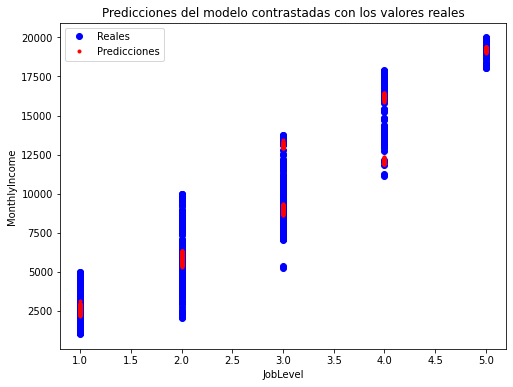

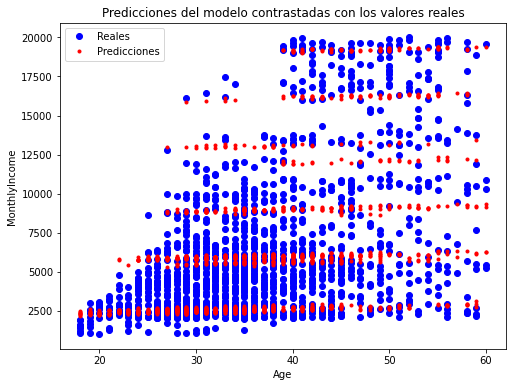

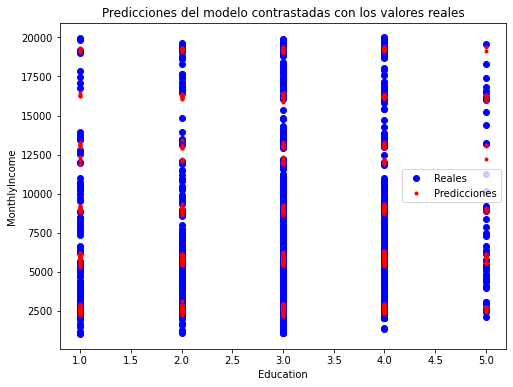

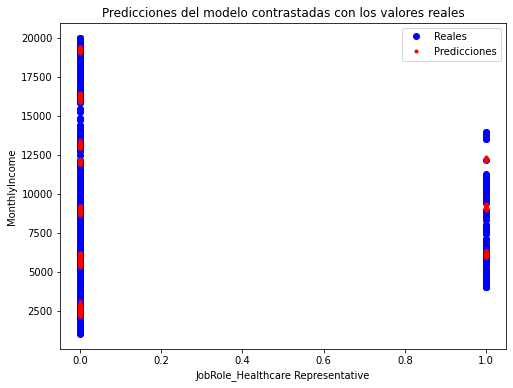

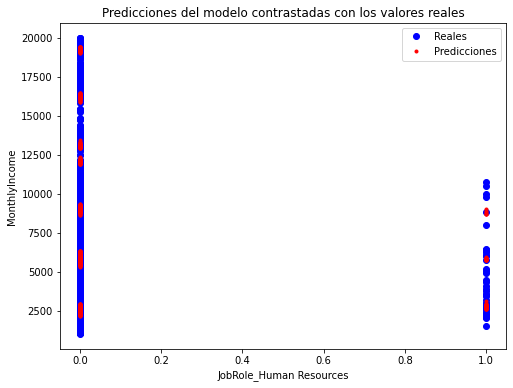

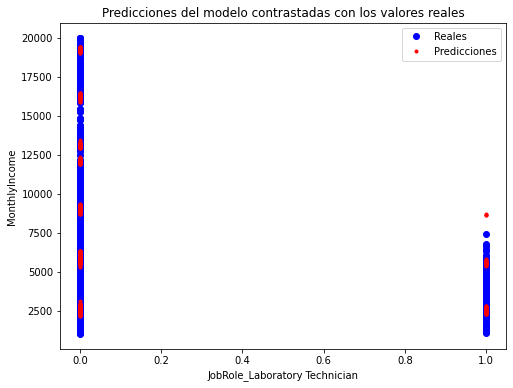

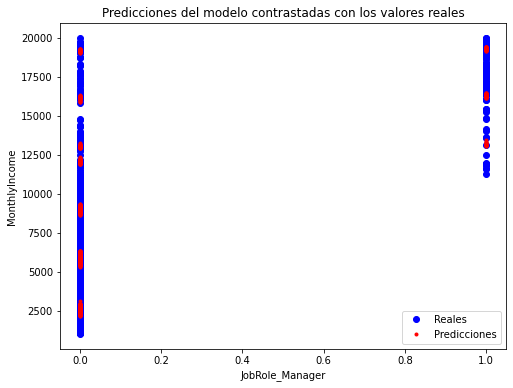

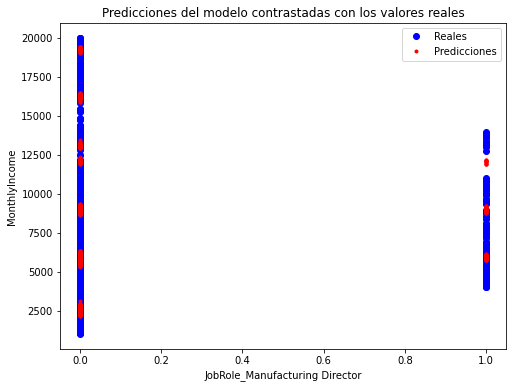

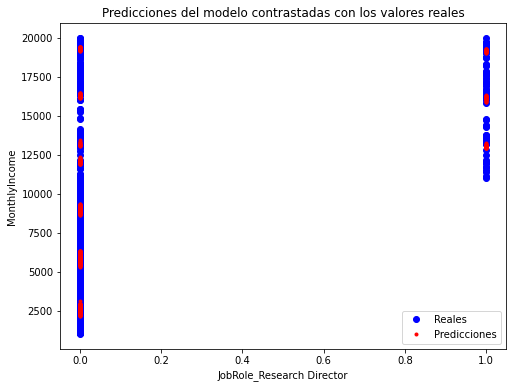

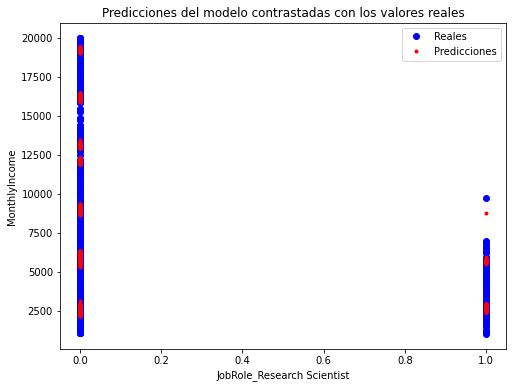

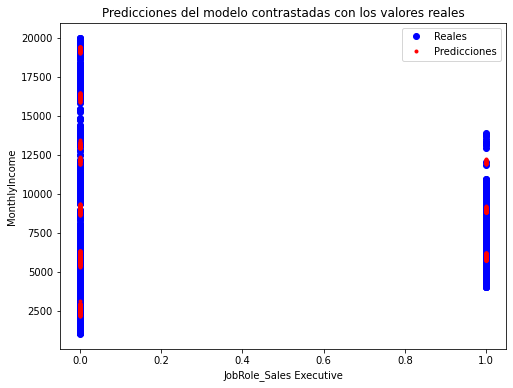

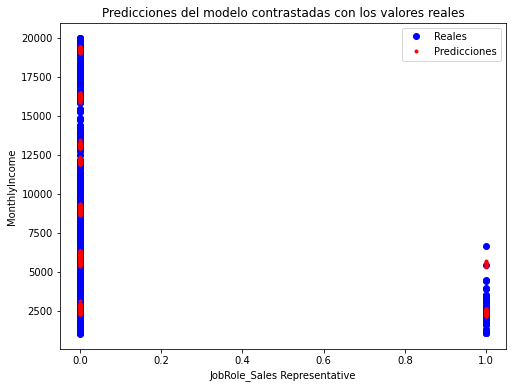

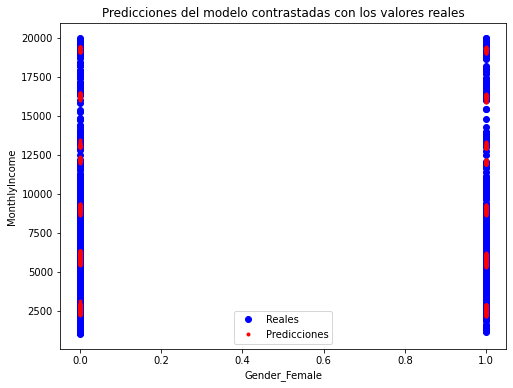

In [420]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(model)


for column in X.columns:
  fig, ax = plt.subplots(figsize=(8,6))

  ax.plot(X[column], y, 'bo', label="True")
  ax.plot(X[column], predictions, 'r.', label="data")
  ax.set_title(f'Predicciones del modelo contrastadas con los valores reales')
  ax.set_xlabel(f'{column}')
  ax.set_ylabel('MonthlyIncome')
  ax.legend(('Reales', 'Predicciones'))
  plt.show()

### Modelo 2: Variables con transformaciones.

A continuación se agregan las transformaciones respectivas y se seleccionan los parámetros.

In [454]:
df_ajustado = pd.DataFrame()
df_ajustado['LogMonthlyIncome'] = np.log(df['MonthlyIncome']+1)
df_ajustado['LogTotalWorkingYears'] = np.log(df['TotalWorkingYears']+1)
df_ajustado['LogAge'] = np.log(df['Age']+1)
df_ajustado['JobLevel'] = df['JobLevel']
df_ajustado['Education'] = df['Education']

In [455]:
  for dummy in df_with_dummies:
    if 'JobRole' in dummy:
      df_ajustado[dummy] = df_with_dummies[dummy]

  for dummy in df_with_dummies:
    if 'Gender' in dummy:
      df_ajustado[dummy] = df_with_dummies[dummy]

In [456]:
df_ajustado.describe()

,LogMonthlyIncome,LogTotalWorkingYears,LogAge,JobLevel,Education,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,8.552752,2.294246,3.606428,2.063946,2.912925,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.400000,0.600000
std,0.664313,0.698631,0.243100,1.106940,1.024165,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.490065,0.490065
min,6.917706,0.000000,2.944439,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.976595,1.945910,3.433987,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.501061,2.397895,3.610918,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.033603,2.772589,3.784190,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.903488,3.713572,4.110874,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [457]:
df_ajustado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LogMonthlyIncome                   1470 non-null   float64
 1   LogTotalWorkingYears               1470 non-null   float64
 2   LogAge                             1470 non-null   float64
 3   JobLevel                           1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   JobRole_Healthcare Representative  1470 non-null   uint8  
 6   JobRole_Human Resources            1470 non-null   uint8  
 7   JobRole_Laboratory Technician      1470 non-null   uint8  
 8   JobRole_Manager                    1470 non-null   uint8  
 9   JobRole_Manufacturing Director     1470 non-null   uint8  
 10  JobRole_Research Director          1470 non-null   uint8  
 11  JobRole_Research Scientist         1470 non-null   uint8

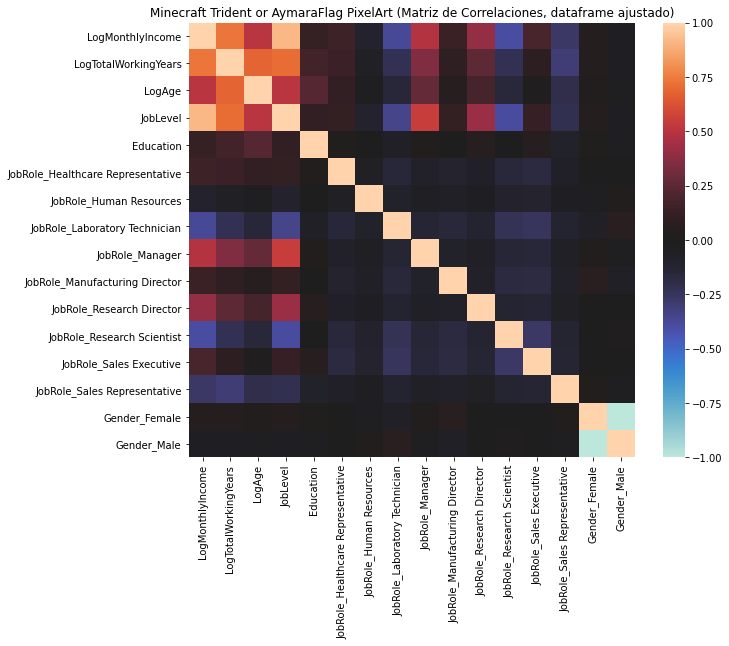

In [458]:
corrM = df_ajustado.corr(method = 'pearson')


fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corrM, ax = ax,
        xticklabels=corrM.columns,
        yticklabels=corrM.columns,center=0.0);

ax.set_title('Minecraft Trident or AymaraFlag PixelArt (Matriz de Correlaciones, dataframe ajustado)');

Nuevamente no se pueden usar JobLevel con TotalWorkingYears juntos

In [459]:
import statsmodels.api as sm

v = ['LogMonthlyIncome', 'LogAge', 'JobLevel',
       'Education', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'Gender_Female']
 #'JobRole_Sales Representative']

y = df_ajustado[v[0]]

X = df_ajustado[v[1:]]

exog = sm.add_constant(X)

model = sm.OLS(y, exog).fit()

predictions = model.predict(exog)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogMonthlyIncome   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     866.9
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:33:37   Log-Likelihood:                 57.027
No. Observations:                1470   AIC:                            -88.05
Df Residuals:                    1457   BIC:                            -19.24
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 6.4860      0.092     70.808      0.000       6.306       6.666
LogAge                                0.1465      0.030      4.870      0.000       0.087       0.206
JobLevel                              0.3969      0.012     33.683      0.000       0.374       0.420
Education                             0.0070      0.006      1.146      0.252      -0.005       0.019
JobRole_Healthcare Representative     0.8415      0.023     36.976      0.000       0.797       0.886
JobRole_Human Resources               0.5952      0.032     18.339      0.000       0.532       0.659
JobRole_Laboratory Technician         0.5084      0.020     24.977      0.000       0.468       0.548
JobRole_Manager                       0.9601      0.034     27.923      0.000       0.893       1.028
JobRole_Manufacturing Director        0.8186      0.021     38.080      0.000       0.776       0.861
JobRole_Research Director             1.0244      0.033     30.655      0.000       0.959       1.090
JobRole_Research Scientist            0.5200      0.020     25.775      0.000       0.480       0.560
JobRole_Sales Executive               0.8281      0.016     50.226      0.000       0.796       0.860
JobRole_Sales Representative          0.3895      0.027     14.190      0.000       0.336       0.443
Gender_Female                         0.0029      0.013      0.228      0.820      -0.022       0.027
==============================================================================
Omnibus:                       35.285   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.889
Skew:                          -0.228   Prob(JB):                     1.99e-12
Kurtosis:                       3.820   Cond. No.                     4.43e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Se obtiene un $R^2$ de 0.877 y un $R^2$ ajustado de 0.876, Las variables más significativas son JobLevel y JobRole, mientras que Education y Gender no tienen una significancia estadística suficientemente fuerte para inferir que afectan en la variable MonthlyIncome. Tal como era previsto en el análisis de datos. En posteriores modelos no se incluirán estas variables (se rechaza la hipótesis que afectan en el sueldo).

Notar que const corresponde a $\beta_0$

El estadístico F permite inferir con alta confianza que sí existe una relación entre las variables entregadas y la variable objetivo. (no se rechaza la hipótesis que afecten en el modelo)

El valor de $R^2$ baja en este modelo, pero sin embargo resulta ser un mejor modelo que el anterior, por el hecho que el sobreajuste es menor y en consecuencia el sesgo también lo es. Lo anterior se nota incluso visualmente en los scatter plot de abajo. Como puede verse, a pesar que la estratificación por JobLevel es fuertemente notoria, el logaritmo ha hecho que los outliers estén más juntos y por lo tanto disminuye el sesgo del modelo.

De igual forma, el valor de $R^2$ no es para nada bajo (relativamente hablando).

Nuevamente la advertencia de multicolinealidad se debe al valor const.

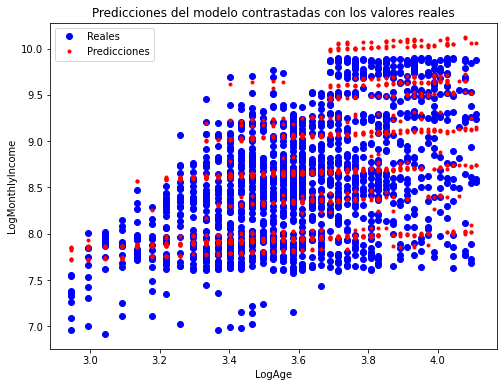

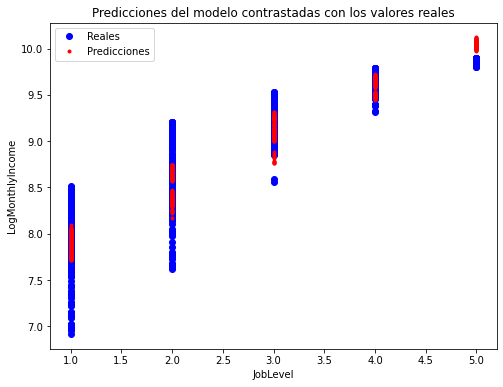

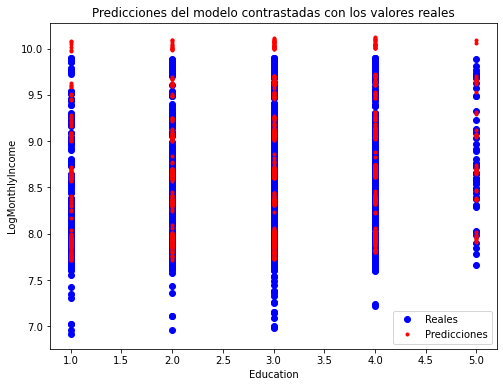

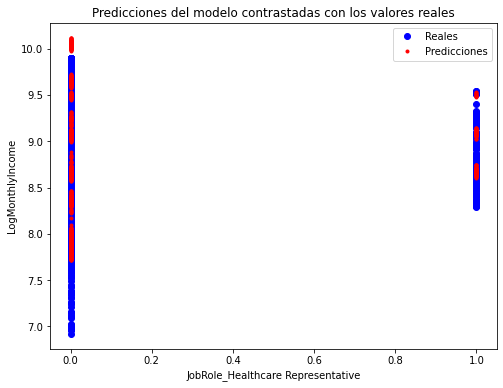

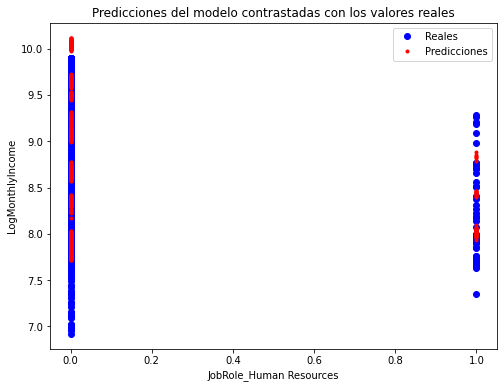

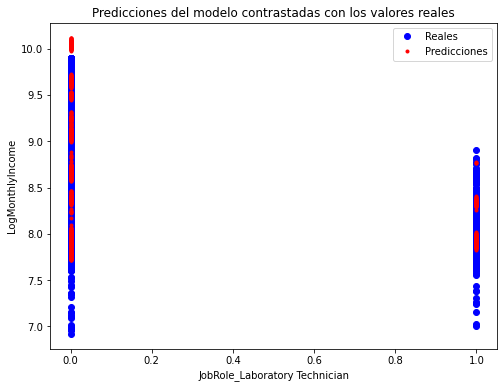

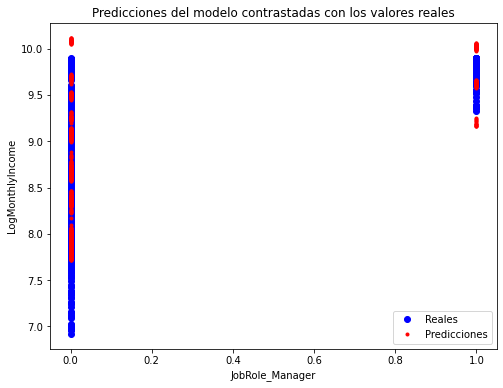

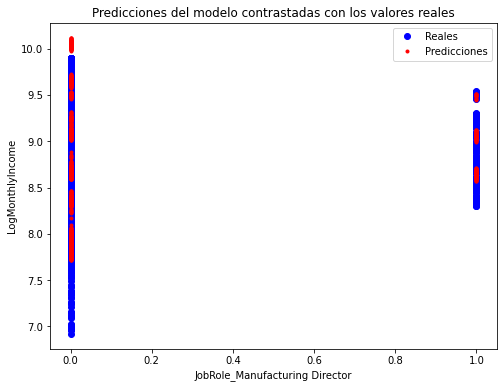

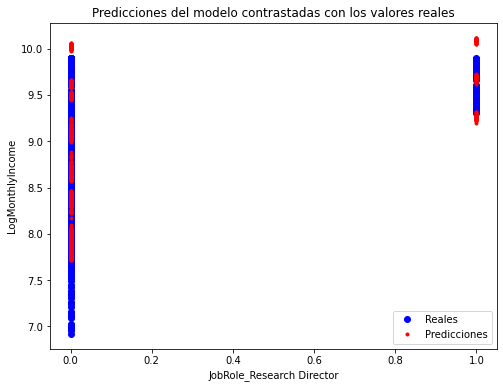

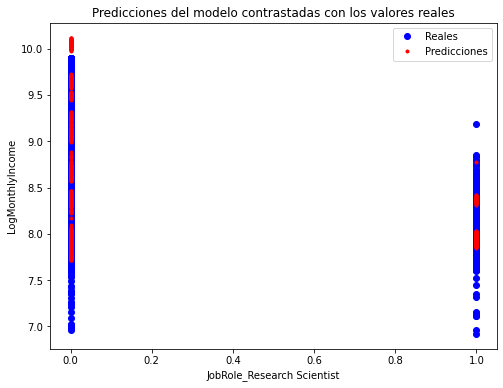

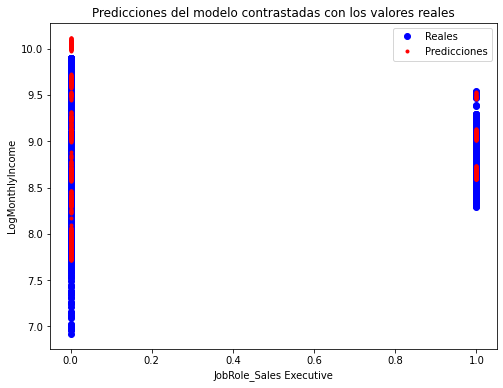

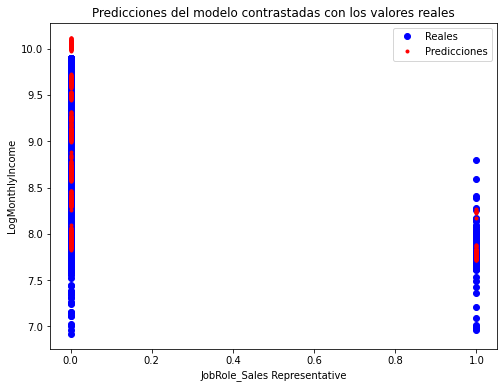

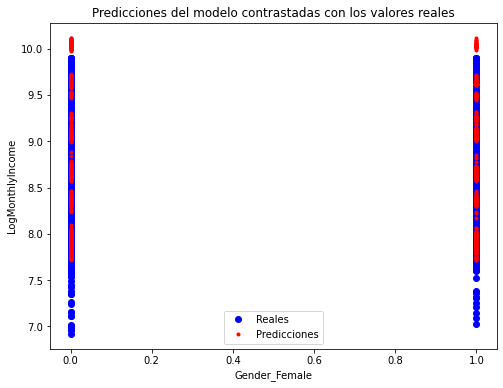

In [460]:
prstd, iv_l, iv_u = wls_prediction_std(model)



for column in X.columns:
  fig, ax = plt.subplots(figsize=(8,6))
  ax.plot(X[column], y, 'bo', label="True")
  ax.plot(X[column], predictions, 'r.', label="data")
  ax.set_title(f'Predicciones del modelo contrastadas con los valores reales')
  ax.set_xlabel(f'{column}')
  ax.set_ylabel('LogMonthlyIncome')
  ax.legend(('Reales', 'Predicciones'))
  plt.show()

### Modelo 3: Evitando la discretización

Dado que la variable JobLevel está discretizando los datos predichos por el modelo, se reemplazará por TotalWorkingYears, la cual no ha sido usada debido a su alta correlación con JobLevel. Para evitar sesgos y sobreajustes, se hará un recorte de datos según los valores anómalos en el MonthlyIncome. Con esto se espera obtener un mejor ajuste que en los modelos anteriores

Se hará la cota inferior y superior según 1.5 x rango intercuartílico [[fuente]](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule)

In [461]:
from scipy.stats import iqr
def IQR(df_ajustado, variable):
  desc = df_ajustado[variable].describe()
  q1 = desc['25%']
  q2 = desc['50%']
  q3 = desc['75%']
  qri = iqr(df_ajustado[variable])

  cota_inf = q1 - (qri * 1.5)
  cota_sup = q3 + (qri * 1.5) 

  df_ajustado = df_ajustado[df_ajustado[variable] > cota_inf ]
  df_ajustado = df_ajustado[df_ajustado[variable] < cota_sup ]
  return df_ajustado

De las tres variables numéricas solo LogTotalWorkingYears tenía outliers incluso con logaritmo, los cuales se limplian a continuación. Posterior a remover los outliers de esta variable las otras seguían sin outliers.

In [464]:
df_limpio = IQR(df_ajustado, 'LogTotalWorkingYears')
df_limpio.describe()

,LogMonthlyIncome,LogTotalWorkingYears,LogAge,JobLevel,Education,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Female,Gender_Male
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,8.615254,2.406674,3.628131,2.134978,2.944122,0.095065,0.034833,0.162554,0.074020,0.105225,0.058055,0.190856,0.236575,0.042816,0.400581,0.599419
std,0.633730,0.561430,0.228328,1.107476,1.021447,0.293412,0.183423,0.369093,0.261899,0.306954,0.233933,0.393119,0.425133,0.202515,0.490194,0.490194
min,7.601902,1.098612,3.044522,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100692,1.945910,3.465736,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.557567,2.397895,3.610918,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.084379,2.833213,3.801044,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.903488,3.713572,4.110874,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Los dummy se agregarán en una unica columna, con codificación numérica para cada JobRole con el objetivo de reducir la dimensionalidad.

In [487]:
df_limpio['JobRole'] = 6*df_limpio['JobRole_Healthcare Representative'] +  3*df_limpio['JobRole_Human Resources'] +2* df_limpio['JobRole_Laboratory Technician'] + 8* df_limpio['JobRole_Manager'] + 5* df_limpio['JobRole_Manufacturing Director'] + 7* df_limpio['JobRole_Research Director'] + 1* df_limpio['JobRole_Research Scientist'] + 4* df_limpio['JobRole_Sales Executive'] + 0* df_limpio['JobRole_Sales Representative'] 

In [503]:
import statsmodels.api as sm

v = ['LogMonthlyIncome', 'LogTotalWorkingYears','JobRole'
       ]
 #'JobRole_Sales Representative']

y = df_limpio[v[0]]

X = df_limpio[v[1:]]

exog = sm.add_constant(X)

model = sm.OLS(y, exog).fit()

predictions = model.predict(exog)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogMonthlyIncome   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     2274.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        02:02:52   Log-Likelihood:                -319.98
No. Observations:                1378   AIC:                             646.0
Df Residuals:                    1375   BIC:                             661.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.0800      0.037    189.648      0.000       7.007       7.153
LogTotalWorkingYears     0.3624      0.018     20.095      0.000       0.327       0.398
JobRole                  0.1811      0.004     40.664      0.000       0.172       0.190
==============================================================================
Omnibus:                       17.506   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.625
Skew:                          -0.232   Prob(JB):                     0.000245
Kurtosis:                       2.729   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se obtiene un  R2  de 0.768 y un  R2  ajustado de 0.768, el estadístico F, nuevamente permite inferir con alta confianza que sí existe una relación entre las variables entregadas y la variable objetivo. (no se rechaza la hipótesis que afecten en el modelo). El p-valor de las variables usadas es tal que permite no rechazar la hipótesis nula que no afectan en el sueldo (i.e. que $\beta_x = 0$).

El modelo con LogTotalWorkingYears funciona aún peor que el modelo N°2. El valor de $R^2$ ya no es tan alto. Esto debido a que **no considerar la variable JobLevel es en realidad un error**, pues es la variable de principal valor en este dataset con respecto al sueldo, y generaría un sesgo de endogenidad. Con respecto a la discretización de las predicciones, a continuación puede verse que funciona peor que el modelo anterior también, debido a que JobRole es también una variable discreta de pocas instancias.

La reducción de dimensionalidad no generó cambios significativos más que el ahorro de memoria, en efecto, esto es trivial ya que simplemente es otra forma de codificar lo mismo.

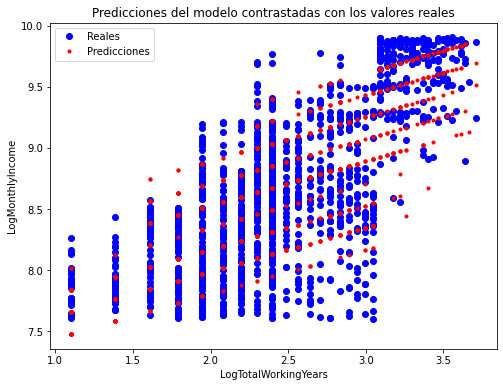

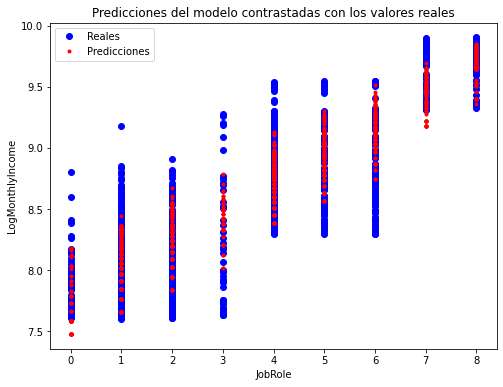

In [504]:
prstd, iv_l, iv_u = wls_prediction_std(model)



for column in X.columns:
  fig, ax = plt.subplots(figsize=(8,6))
  ax.plot(X[column], y, 'bo', label="True")
  ax.plot(X[column], predictions, 'r.', label="data")
  ax.set_title(f'Predicciones del modelo contrastadas con los valores reales')
  ax.set_xlabel(f'{column}')
  ax.set_ylabel('LogMonthlyIncome')
  ax.legend(('Reales', 'Predicciones'))
  plt.show()

### Modelo 4: Modelo 2, pero con los cambios del modelo 3...

A modo netamente experimental, se trata de rebobinar el criterio de variables anteriormente elegidas, y probar las mismas del modelo 2, pero con los arreglos del modelo 3...

In [509]:
import statsmodels.api as sm

v = ['LogMonthlyIncome', 'LogAge', 'JobLevel','JobRole']
 #'JobRole_Sales Representative']

y = df_limpio[v[0]]

X = df_limpio[v[1:]]

exog = sm.add_constant(X)

model = sm.OLS(y, exog).fit()

predictions = model.predict(exog)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LogMonthlyIncome   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     3313.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        02:16:32   Log-Likelihood:                 126.25
No. Observations:                1378   AIC:                            -244.5
Df Residuals:                    1374   BIC:                            -223.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4081      0.102     72.333      0.000       7.207       7.609
LogAge         0.0202      0.030      0.679      0.497      -0.038       0.078
JobLevel       0.4175      0.010     42.414      0.000       0.398       0.437
JobRole        0.0662      0.005     14.567      0.000       0.057       0.075
==============================================================================
Omnibus:                        2.032   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.948
Skew:                           0.058   Prob(JB):                        0.378
Kurtosis:                       3.143   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finalmente en este modelo se obtienen resultados incluso mejores que en el modelo 2, esto pues, no se están considerando las variables de poco valor como el género o la educación. Incluso visualmente pueden verse mejoras en los scatter plot (A pesar que se genera una nube de predicciones que sobrevalora demasiado el último JobLevel). Este sería el mejor modelo que se pudo encontrar, dado su mayor $R^2$ y alta verosimilitud. El p-valor de LogAge podría generar dudas si es que esta variable tiene un valor significativo para este modelo. 


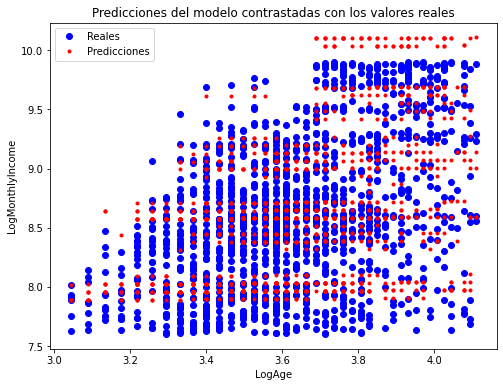

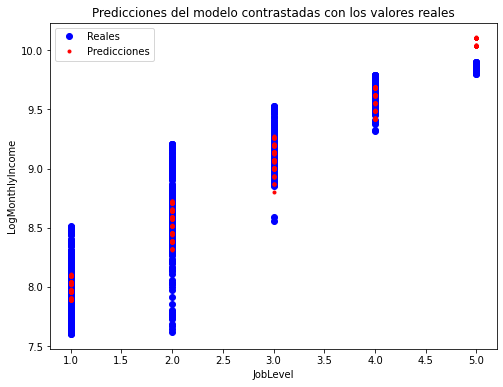

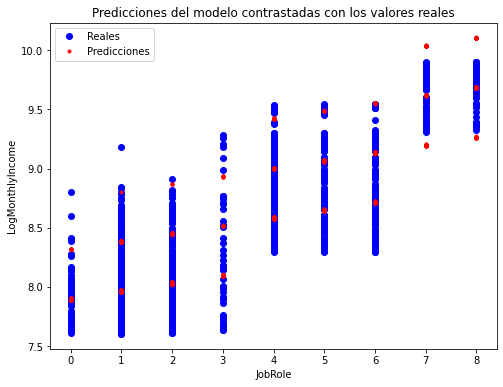

In [507]:
prstd, iv_l, iv_u = wls_prediction_std(model)



for column in X.columns:
  fig, ax = plt.subplots(figsize=(8,6))
  ax.plot(X[column], y, 'bo', label="True")
  ax.plot(X[column], predictions, 'r.', label="data")
  ax.set_title(f'Predicciones del modelo contrastadas con los valores reales')
  ax.set_xlabel(f'{column}')
  ax.set_ylabel('LogMonthlyIncome')
  ax.legend(('Reales', 'Predicciones'))
  plt.show()

## P1  ¿A qué se debe los resultados que obtiene?

Esto se explica en detalle en cada modelo, pero a nivel general, los resultados están fuertemente ligados al hecho que se modeló con variables nominales y que estas fueran las de mayor valor en el dataset. Para evitar esta suerte de 'discretización' en las predicciones, se sospecha que faltó añadir más variables en el modelo, que compensaran el efecto de las nominales. Aún así, en todos los modelos no se rechazó la hipótesis nula de que las variables no afectaran en el sueldo, lo que es favorable a las conclusiones hechas en la parte 1. 

## P2 ¿Identifica algún problema de endogeneidad en su análisis? ¿Cómo podría solucionarse?

Si, en el modelo 3 es donde más sospechas hay de endogenidad por falta de variables, en efecto, debido a que no se incluyó la variable de mayor valor y se sustituyó por una de menor correlación con la variable objetivo pero con alta correlación con la variable JobLevel. 

Tal como se dijo en párrafos anteriores, se dice que no es trivial tratar con el sesgo de endogenidad pero que sin embargo este generaría grandes catástrofes en un modelamiento serio y completo, por lo que se requieren mayores investigaciones para confirmar o no si el paupérrimo desempeño de algunos modelos es debido parcial o totalmente al sesgo de endogenidad.

A priori, podría existir endogenidad en este trabajo por la no inclusión de variables necesarias, vinculandolo con lo dicho en la P1, añadir variables que amortiguen en carácter discreto de las predicciones mejoraría sustancialmente el resultado, por lo que en ese sentido existiría un sesgo de endogenidad por falta de variables.
